In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Importar las librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Importar los datos del archivo
basketball = pd.read_csv('basketball.csv')

In [5]:
# Se visualiza la información de los datos
basketball.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [6]:
# Visualizar los 5 primeros registros
basketball.head (5)

,height,weight,success_field_goals,success_free_throws,avg_points_scored
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [7]:
# Renombrar las columnas
basketball= basketball.rename(columns={'height':'Altura','weight':'Peso','success_field_goals':'TirosCampoExito','success_free_throws':'TirosLibreExito','avg_points_scored':'PuntosProm'})

In [8]:
# Visualizar los 5 primeros registros con las columnas renombradas
basketball.head (5)

,Altura,Peso,TirosCampoExito,TirosLibreExito,PuntosProm
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2


In [9]:
# Se verifica la cantidad de nulos por columna
null = basketball.isnull().sum()
null

Altura             0
Peso               0
TirosCampoExito    0
TirosLibreExito    0
PuntosProm         0
dtype: int64

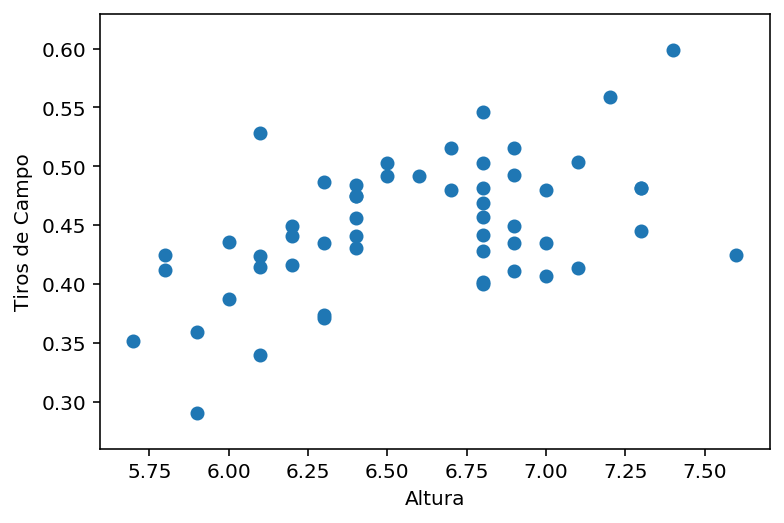

In [10]:
# Se genera una gráfica de dispersión para visualizar la distribución de los datos entre las variables independientes y la variable objetivo (dependiente)

%matplotlib inline
a= basketball.Altura
b= basketball.TirosCampoExito
plt.scatter(a, b)
plt.xlabel('Altura')
plt.ylabel('Tiros de Campo')
plt.show()

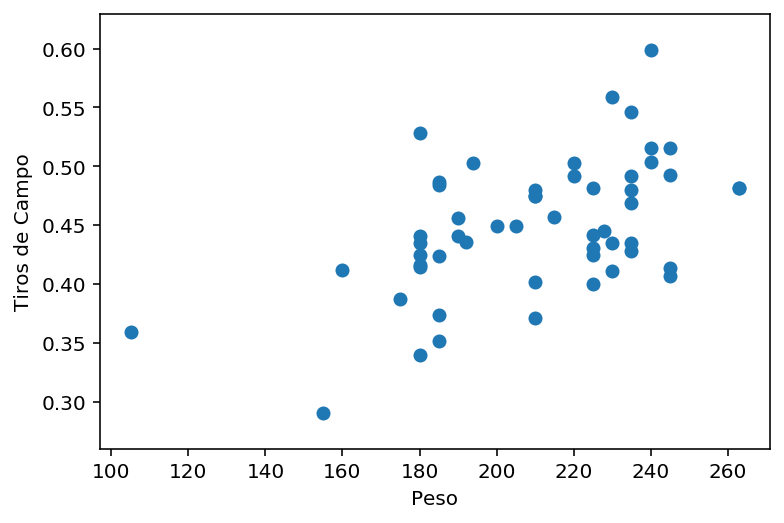

In [11]:
c= basketball.Peso
d= basketball.TirosCampoExito
plt.scatter(c, d)
plt.xlabel('Peso')
plt.ylabel('Tiros de Campo')
plt.show()

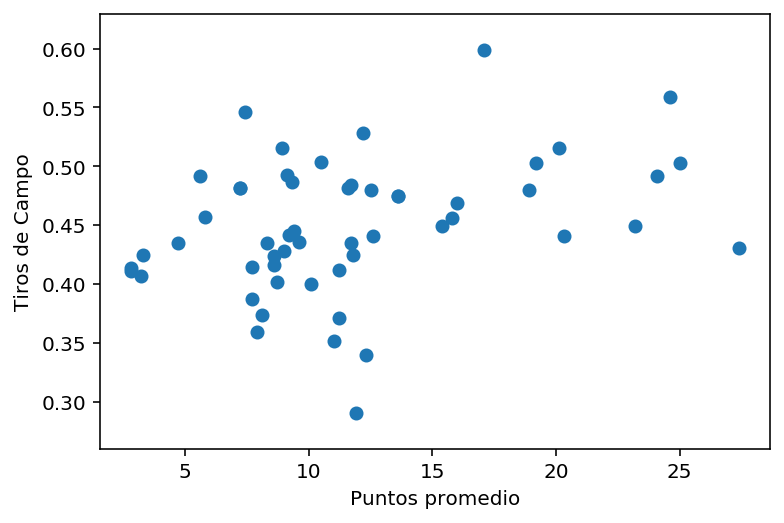

In [12]:
e= basketball.PuntosProm
f= basketball.TirosCampoExito
plt.scatter(e, f)
plt.xlabel('Puntos promedio')
plt.ylabel('Tiros de Campo')
plt.show()

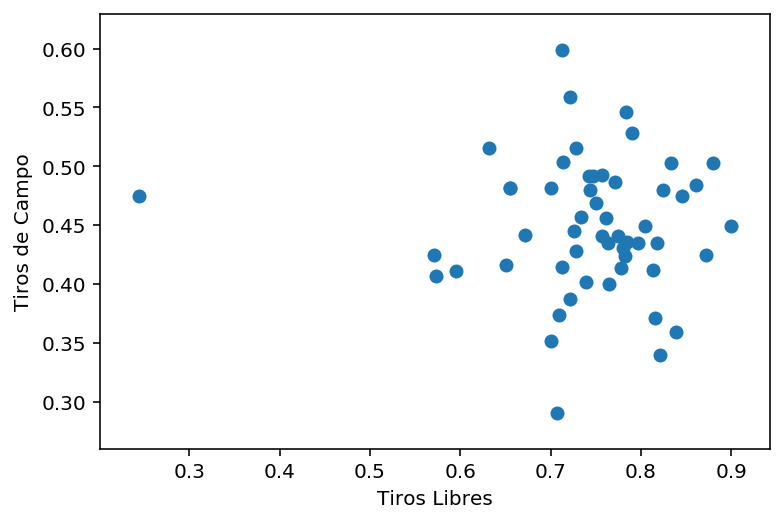

In [13]:
# Se visualiza que las variables que cuentan con más relación son tiros libre y tiros de campo
g= basketball.TirosLibreExito
h= basketball.TirosCampoExito
plt.scatter(g, h)
plt.xlabel('Tiros Libres')
plt.ylabel('Tiros de Campo')
plt.show()

In [14]:
# Se define la variable objetivo
y = basketball.TirosCampoExito
y.head()

0    0.442
1    0.435
2    0.456
3    0.416
4    0.449
Name: TirosCampoExito, dtype: float64

In [22]:
# Se excluye la variable objetivo (dependiente) de las variables independientes
x= basketball.drop(['TirosCampoExito'], axis=1)

# Se comprueba la dimensión de la matriz
x.shape

(54, 4)

In [23]:
# Se muestran las variables independientes
x.head()

,Altura,Peso,TirosLibreExito,PuntosProm
0,6.8,225,0.672,9.2
1,6.3,180,0.797,11.7
2,6.4,190,0.761,15.8
3,6.2,180,0.651,8.6
4,6.9,205,0.900,23.2


In [24]:
# Se separa el conjunto de datos en 2 grupos: entrenamiento (train) y prueba (test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [25]:
# Se define el modelo Regresión Lineal
from sklearn import linear_model
model = linear_model.LinearRegression()
# Se entrena el modelo
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# Realizar una predicción 
y_pred = model.predict(x_train)

In [31]:
# Predicción sobre el train
y_pred

array([0.48019376, 0.43196226, 0.41314897, 0.40721948, 0.42010728,
       0.53468679, 0.48019376, 0.39931817, 0.40524089, 0.46312968,
       0.40961463, 0.51456569, 0.35059831, 0.52133459, 0.40563278,
       0.42887321, 0.43019336, 0.44931748, 0.4459357 , 0.44711476,
       0.42875497, 0.45830145, 0.45797567, 0.44575454, 0.41569774,
       0.43584449, 0.51640622, 0.45736626, 0.44996769, 0.45219911,
       0.47106349, 0.50742475, 0.4581407 , 0.45358465, 0.44225657,
       0.51323935, 0.50731235, 0.45802781, 0.44173297, 0.39550899,
       0.39693364, 0.42095021, 0.44317481])

In [32]:
# Se retorna el coeficiente de determinación R^2 de la predicción con las variables de entrenamiento
model.score(x_train,y_train)

0.4625808317790696

In [33]:
# Se retorna el coeficiente de determinación R^2 de la predicción con las variables de prueba
model.score(x_test,y_test)

0.046763925539042295